## Plot the variance of average growth rates under all market segmentations

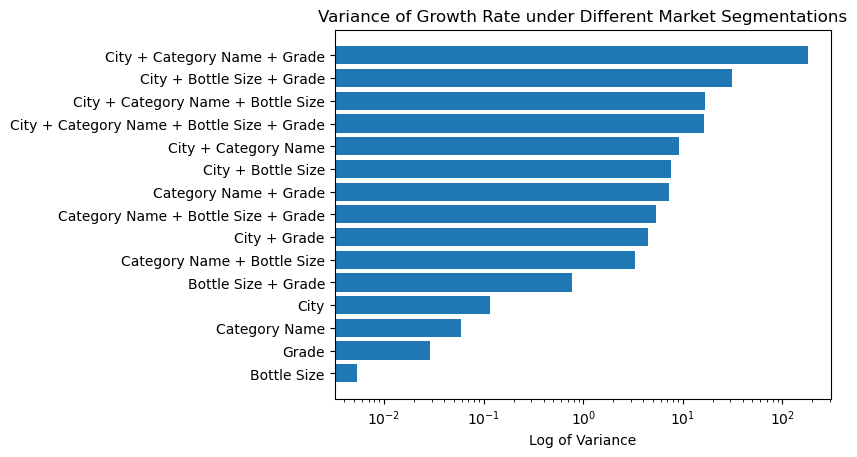

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('./var_growth_rate.csv')
df = pd.DataFrame(data)

segmentations = list(df.iloc[:, 0])
vars = list(df.iloc[:, 1])
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(segmentations))

ax.barh(segmentations, vars, align='center')
ax.set_yticks(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xscale(value='log')
ax.set_xlabel('Log of Variance')
ax.set_title('Variance of Growth Rate under Different Market Segmentations')
  
# Show the plot
plt.savefig('./graphs/var.png',bbox_inches='tight')
plt.show()

## Plot the mean, max, min of average growth rates under all market segmentations, Scaled by log

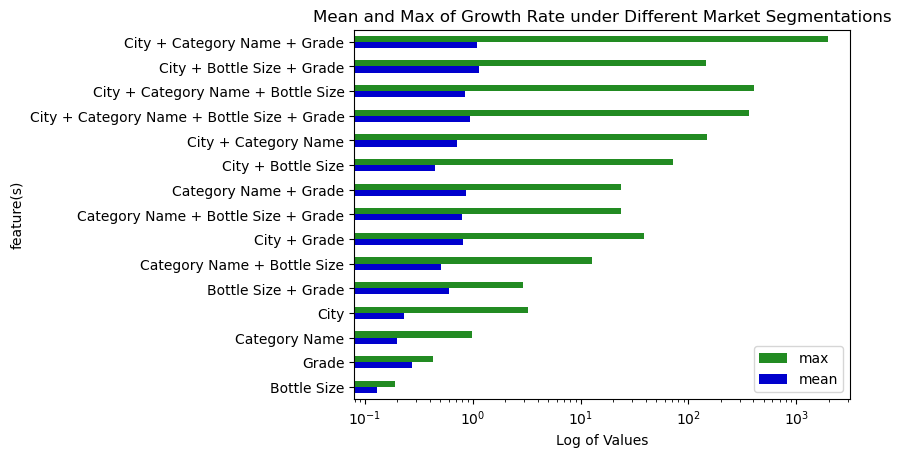

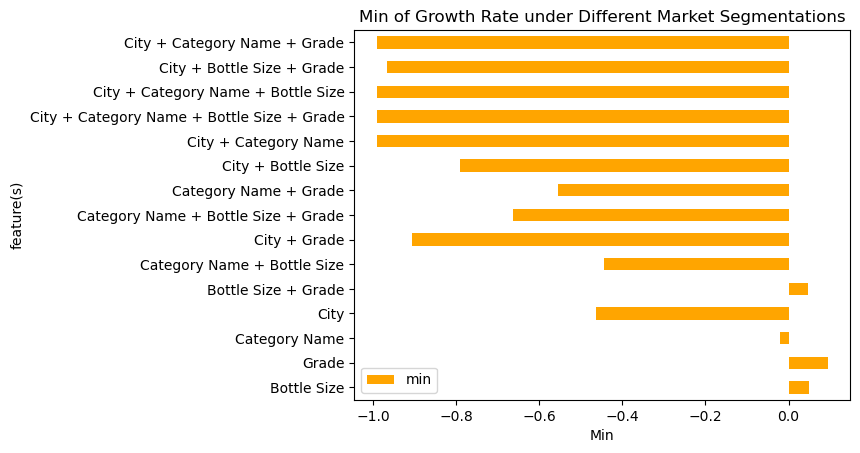

In [48]:
fig, ax = plt.subplots()
df.plot(x="feature(s)", y=["max", "mean"], kind="barh", legend = True, logx=True, ax=ax, color=["forestgreen","mediumblue"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Log of Values')
ax.set_title('Mean and Max of Growth Rate under Different Market Segmentations')
plt.savefig('./graphs/mean_max.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
df.plot(x="feature(s)", y="min", kind="barh", ax=ax, color="orange")
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Min')
ax.set_title('Min of Growth Rate under Different Market Segmentations')
plt.savefig('./graphs/min.png', bbox_inches='tight')
plt.show()

## Plot Growth Distribution under Market Segmentations of Top 5 Variance

of the first 30 rows

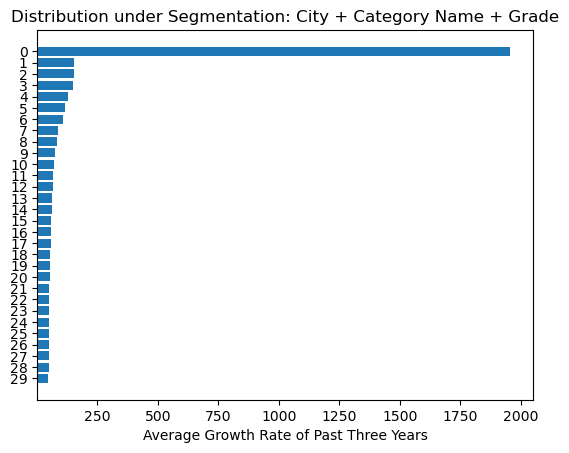

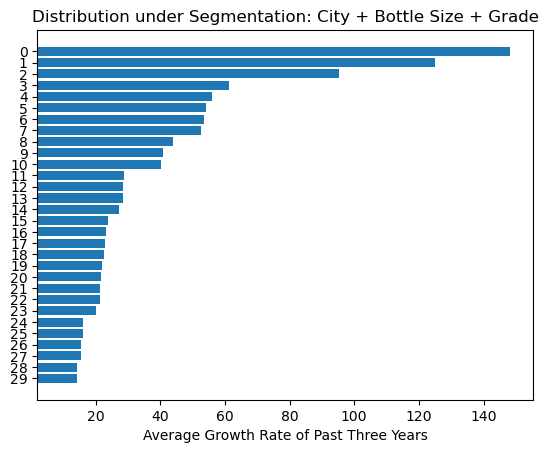

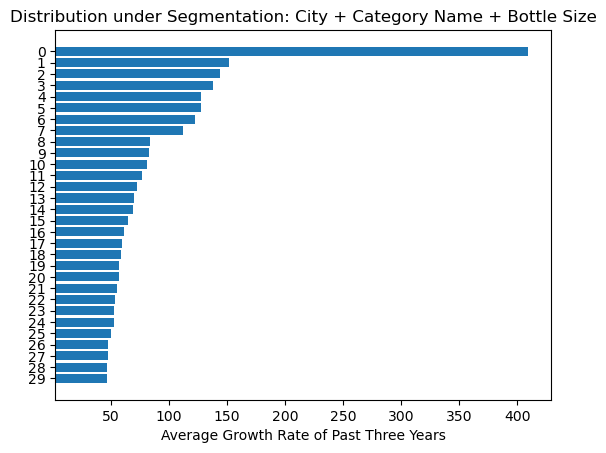

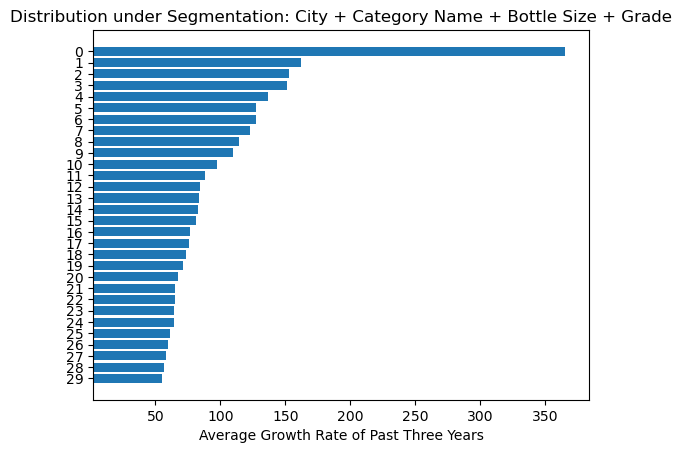

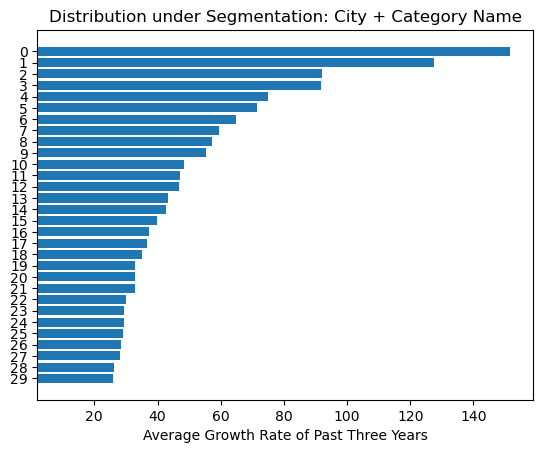

In [49]:
top5 = list(df.iloc[:5,0])

import os
import glob

for i in top5:
    path = os.getcwd()
    path1 = os.path.join(path, "tables")
    path2 = os.path.join(path1, i)
    path3 = os.path.join(path2, "*.csv")
    csv_files = glob.glob(path3)

    sub = pd.read_csv(csv_files[0]).sort_values('Avg Growth Rate', ascending=False)
    rows = sub.iloc[:30]

    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(rows))

    ax.barh(y_pos, rows['Avg Growth Rate'], align='center',left=2)
    ax.set_yticks(y_pos)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Average Growth Rate of Past Three Years')
    ax.set_title("Distribution under Segmentation: "+i)
    
    plt.savefig("./graphs/top5/"+str(top5.index(i))+".png")
    plt.show()